In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplt
import matplotlib as plt
import datetime as dati

In [2]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

In [4]:
train_csv = pd.read_csv("./data/friofrio/Train_TP2_Datos_2020-2C.csv",
        parse_dates = ['Account_Created_Date', 'Opportunity_Created_Date',
                       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date',
                       'Quote_Expiry_Date', 'Last_Modified_Date','Last_Activity' ])
# Limpio registros con muchos datos faltantes o inutiles
train_csv = train_csv.drop(columns= ['ID', 'Prod_Category_A', 'Quote_Type',
                                 'Product_Category_B', 'Delivery_Terms',
                                 'Actual_Delivery_Date', 'Submitted_for_Approval',
                                 'Last_Activity','Price', 'Currency','Brand', 
                                 'Opportunity_Type', 'Size','Product_Type',
                                 'Account_Type', 'ASP_Currency', 'ASP_(converted)_Currency',
                                 'Total_Amount_Currency', 'Account_Name',
                                 'Opportunity_Name','Total_Taxable_Amount_Currency',
                                 'Product_Family', 'Product_Name'])

In [5]:
train_csv = train_csv.loc[(train_csv['Stage'] == 'Closed Won') | (train_csv['Stage'] == 'Closed Lost')]
train_csv['Stage'].value_counts()

Closed Won     9533
Closed Lost    7350
Name: Stage, dtype: int64

In [6]:
train_csv['Oportunidad ganada'] = (train_csv['Stage'] == 'Closed Won').astype(int)

In [7]:
scores= train_csv[['Opportunity_ID','Oportunidad ganada']].groupby('Opportunity_ID').mean()
scores.head()

,Oportunidad ganada
Opportunity_ID,
0,0
1,1
2,1
3,0
4,0


In [8]:
#train_grouped = train_csv.groupby(['Opportunity_ID']).mean().reset_index('Opportunity_ID')
#train_grouped.columns=['Region', 'Territory','Bureaucratic_Code','Account_Type', 'Billing_Country', 'Opportunity_Type',
#                              'Account_Name','Account_Owner', 'Opportunity_Owner','Quote_Type', 'Delivery_Terms',
#                            'Pricing, Delivery_Terms_Quote_Appr',
#                            'Sales_Contract_No', 'Opportunity_ID', 'Opportunity_Name','Source ', 'Account_Created_Date',
#                            'Bureaucratic_Code_0_Approval', 'Bureaucratic_Code_0_Approved','Pricing, Delivery_Terms_Approved',
#               'Last_Modified_By', 'Product_Family','Product_Name', 'Month', 'Delivery_Quarter','ganado','counter',
#                            'Total_Taxable_Amount_Currency','Total_Taxable_Amount','Total_Amount_Currency','Total_Amount',
#                           'TRF','Delivery_Year','Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'ASP_(converted)_Currency',
#                           'ASP_(converted)', 'ASP_Currency', 'ASP', 'Quote_Expiry_Date', 'Last_Modified_Date','Opportunity_Created_Date']

In [9]:
train_csv_agrupado = pd.read_csv('Features_agrupados_Train_Lucas.csv').set_index('Opportunity_ID')#.drop(columns= ['Unnamed: 0'])
train_csv_agrupado.head()
train_csv_agrupado = train_csv_agrupado.merge(scores, on = 'Opportunity_ID')

In [10]:
#train_csv_numerics = train_csv.select_dtypes(include = np.number).fillna(0)

In [11]:
#X = train_csv_numerics.drop(columns = 'Oportunidad ganada').fillna(0)
X = train_csv_agrupado.drop(columns = 'Oportunidad ganada').fillna(0)

#y = train_csv_numerics[['Oportunidad ganada']].fillna(0)
y = train_csv_agrupado[['Oportunidad ganada']].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [12]:
X_train.head()

,ASP_sum,ASP_mean,ASP_median,ASP_std,ASP_max,ASP_min,ASP_(converted)_sum,ASP_(converted)_mean,ASP_(converted)_median,ASP_(converted)_std,...,Product_Family_count_mean,Product_Family_count_std,Month_mean_mean,Month_mean_std,Month_count_mean,Month_count_std,Delivery_Quarter_mean_mean,Delivery_Quarter_mean_std,Delivery_Quarter_count_mean,Delivery_Quarter_count_std
Opportunity_ID,,,,,,,,,,,,,,,,,,,,,
1568,0.530,0.530,0.530,0.000000,0.530,0.530,0.53000,0.53000,0.53000,0.000000,...,602.0,0.000000,0.136364,0.000000,66.0,0.000000,0.135135,0.000000,111.0,0.00000
2362,0.580,0.580,0.580,0.000000,0.580,0.580,0.58000,0.58000,0.58000,0.000000,...,186.0,0.000000,0.354839,0.000000,279.0,0.000000,0.471164,0.000000,919.0,0.00000
4009,0.780,0.390,0.390,0.014142,0.400,0.380,0.88226,0.44113,0.44113,0.015995,...,107.0,121.622366,0.503610,0.000018,277.0,1.414214,0.477435,0.000198,2027.5,2.12132
5499,0.375,0.375,0.375,0.000000,0.375,0.375,0.42416,0.42416,0.42416,0.000000,...,242.0,0.000000,0.452316,0.000000,367.0,0.000000,0.499776,0.000000,2235.0,0.00000
2013,68.000,68.000,68.000,0.000000,68.000,68.000,0.61135,0.61135,0.61135,0.000000,...,770.0,0.000000,0.234043,0.000000,141.0,0.000000,0.361983,0.000000,605.0,0.00000


In [13]:
xgbr = xgb.XGBRegressor(
    objective ='binary:logistic',
    eval_metric = 'logloss',
    colsample_bytree = 0.5,
    learning_rate = 0.09,
    max_depth = 20,
    alpha = 0.1,
    n_estimators = 75)

xgbr.fit(X_train, y_train)

preds = xgbr.predict(X_test)

log_loss(y_test, preds, eps=1e-15, normalize=True, sample_weight=None, labels=None)

0.19657344485272057

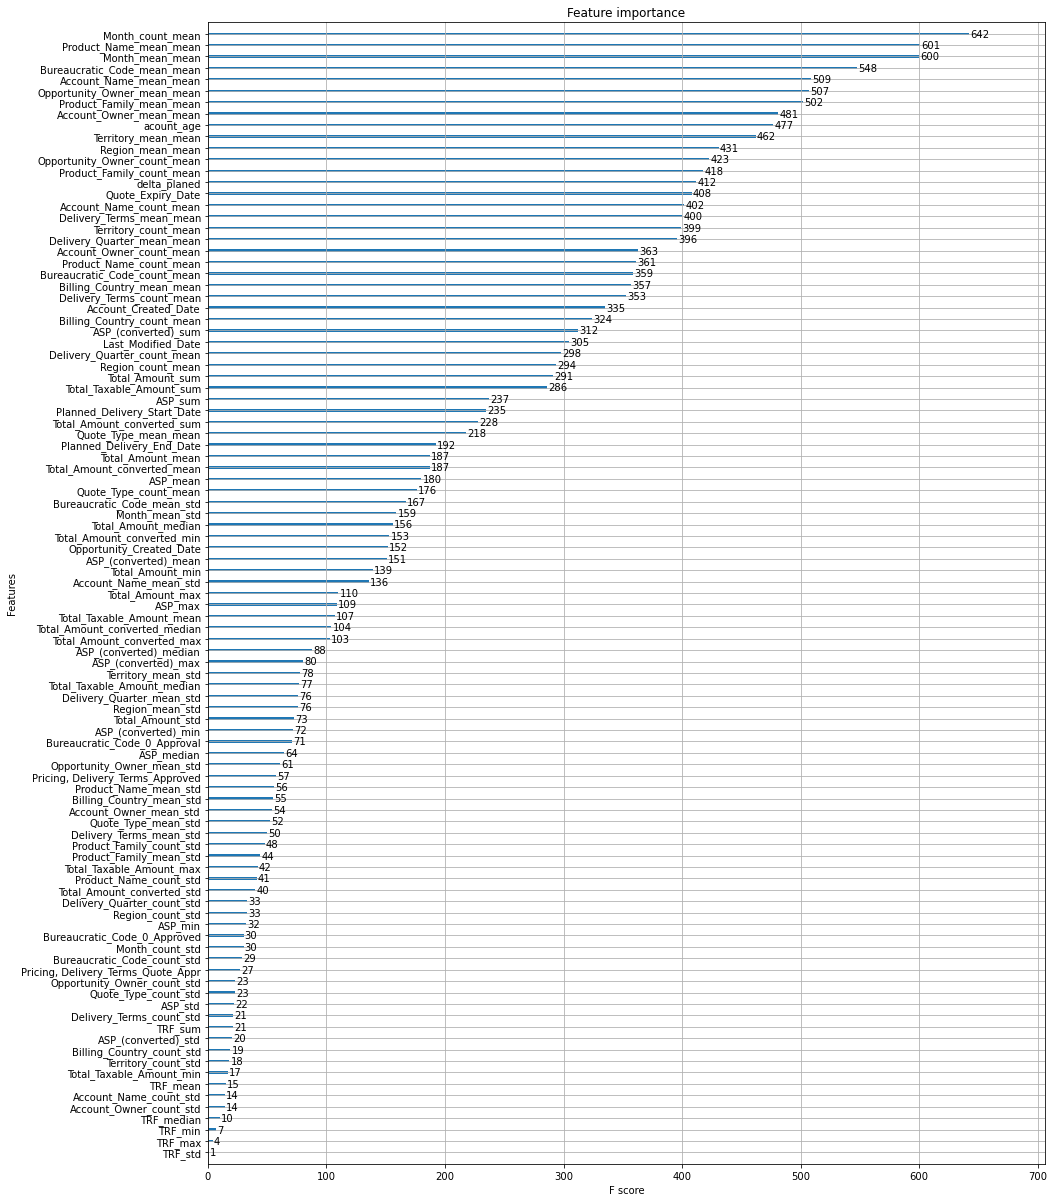

In [14]:
fig, ax = mplt.subplots(1,1,figsize=(15, 21))
xgb.plot_importance(xgbr,ax = ax)

mplt.show()

In [15]:
train_csv_lucas = pd.read_csv('Features_Train_Lucas.csv')

In [16]:
train_csv_lucas = train_csv_lucas.select_dtypes(include = np.number).fillna(0)
train_csv_lucas.dtypes

Unnamed: 0                         int64
ID                                 int64
Region_ganados                     int64
Region_count                       int64
Region_mean                      float64
                                  ...   
Total_Amount_converted_mean      float64
Total_Amount_converted_median    float64
Total_Amount_converted_std       float64
Total_Amount_converted_max       float64
Total_Amount_converted_min       float64
Length: 82, dtype: object

In [17]:
test_csv_lucas = pd.read_csv('Features_agrupados_Test_Lucas.csv').set_index('Opportunity_ID')

pd.Series(test_csv_lucas.index).array

<PandasArray>
[10689, 10690, 10691, 10692, 10693, 10694, 10695, 10696, 10697, 10698,
 ...
 12359, 12360, 12361, 12362, 12363, 12364, 12365, 12366, 12367, 12368]
Length: 1567, dtype: int64

In [18]:
preds_to_submit = (xgbr.predict(test_csv_lucas))

In [19]:
index= pd.Series(test_csv_lucas.index).array

result = pd.DataFrame(index=test_csv_lucas.index)
result['Target'] = preds_to_submit
#result['Opportunity_ID']
#result
#preds_to_submit
#index
result.head()
result = result.reset_index()
result

,Opportunity_ID,Target
0,10689,0.234232
1,10690,0.196513
2,10691,0.003470
3,10692,0.010929
4,10693,0.771442
...,...,...
1562,12364,0.500717
1563,12365,0.017917
1564,12366,0.018890
1565,12367,0.002377


In [20]:
result.to_csv('predicciones.csv', index = False)